**Part I**

Begin by modeling a biased coin toss. Bayes Theorem tells us that: 

$$prob(X|D,I)=\frac{prob(D|X,I)*prob(X|I)}{Prob(D|I)}$$ 

$$prob(D|H,I)=\frac{n!}{h!(n-h)!}H^h(1-H)^{n-h}$$

In [1]:
import numpy as np
import pandas as pd
import random
import matplotlib.pyplot as plt 

def DHI(n,h,H):
    DHI = np.math.factorial(n)/(np.math.factorial(h)*np.math.factorial(n-h))*(H**h)*(1-H)**(n-h)
    return DHI

def bct(n,H):
    h = np.random.binomial(n, H)
    DHI = np.math.factorial(n)/(np.math.factorial(h)*np.math.factorial(n-h))*(H**h)*(1-H)**(n-h)
    return DHI

In [2]:
def vsH(TrH,n,lst):
    DHIs = []
    h = np.random.binomial(n, TrH)
    for H in lst:
        DHIs.append(DHI(n,h,H))
    plt.plot(lst,DHIs)
    plt.xlabel('H values')
    plt.ylabel('Posterior')
    plt.title('Estiamte of True H '+str(TrH)+' with '+str(n)+' Trials')
    plt.show()

In [4]:
Hs = np.arange(0,1,.01)

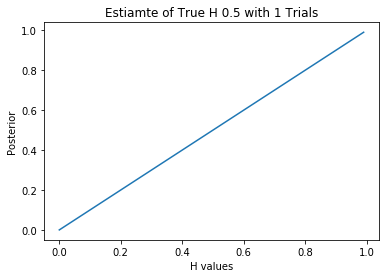

In [5]:
vsH(.5,1,Hs)

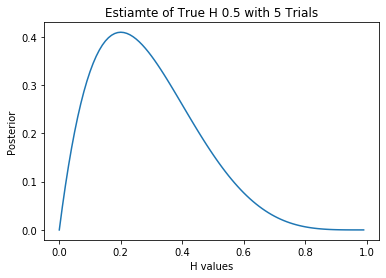

In [6]:
vsH(.5,5,Hs)

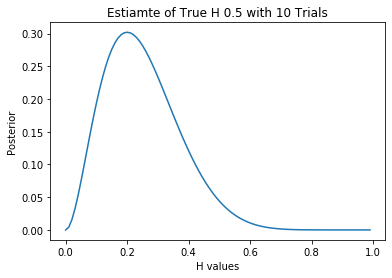

In [7]:
vsH(.5,10,Hs)

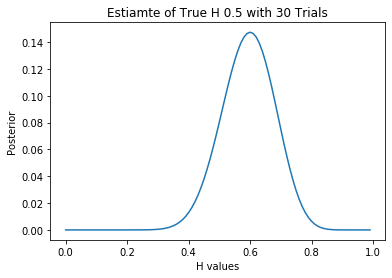

In [8]:
vsH(.5,30,Hs)

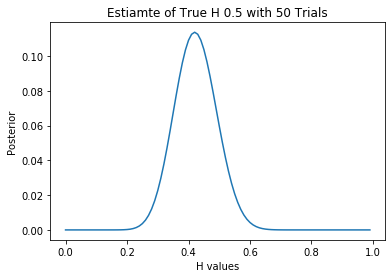

In [9]:
vsH(.5,50,Hs)

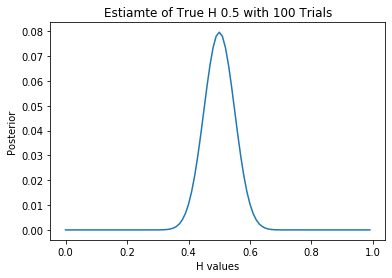

In [62]:
vsH(.5,100,Hs)

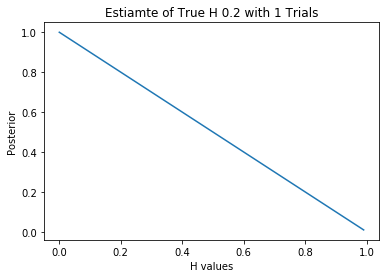

In [61]:
vsH(.2,1,Hs)

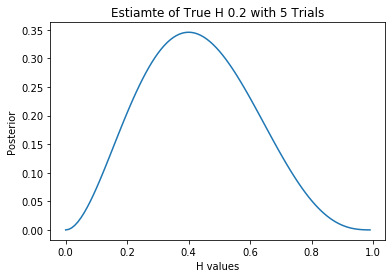

In [12]:
vsH(.2,5,Hs)

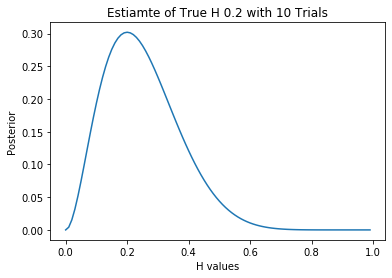

In [13]:
vsH(.2,10,Hs)

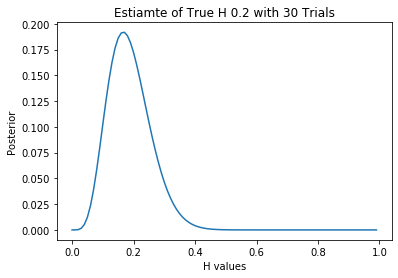

In [14]:
vsH(.2,30,Hs)

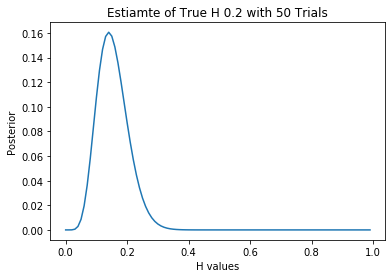

In [15]:
vsH(.2,50,Hs)

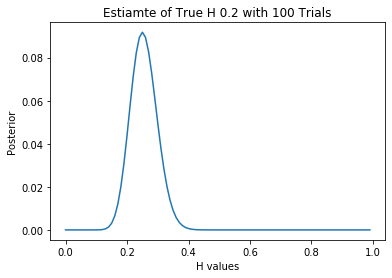

In [16]:
vsH(.2,100,Hs)

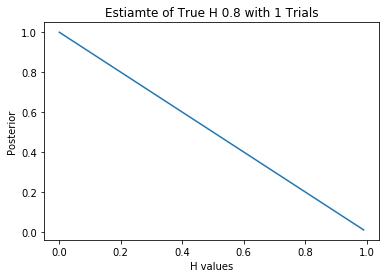

In [17]:
vsH(.8,1,Hs)

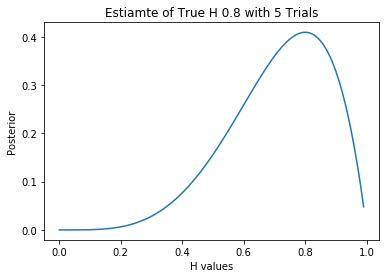

In [18]:
vsH(.8,5,Hs)

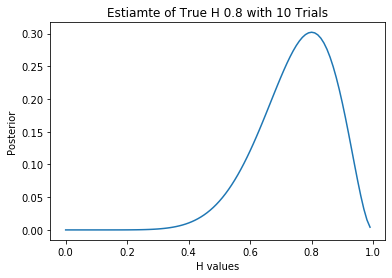

In [19]:
vsH(.8,10,Hs)

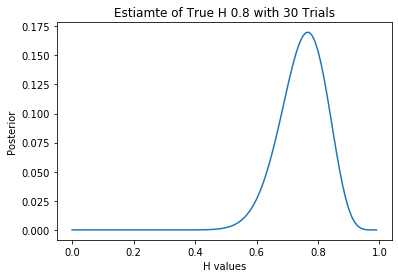

In [20]:
vsH(.8,30,Hs)

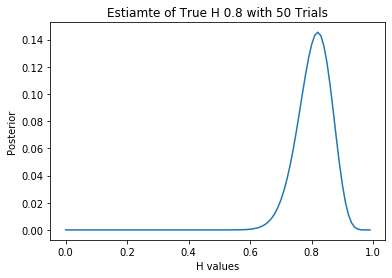

In [21]:
vsH(.8,50,Hs)

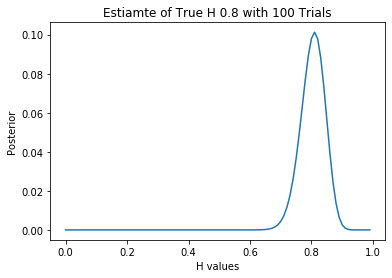

In [22]:
vsH(.8,100,Hs)

In [23]:
def Gauss(H,a,b,c):
    G = a*np.exp(-((H-b)**2)/(2*(c**2)))
    return G

def vsHG(TrH,n,lst,a,b,c):
    DHIs = []
    h = np.random.binomial(n, TrH)
    for H in lst:
        DHIs.append(DHI(n,h,H)*Gauss(H,a,b,c))
    plt.plot(lst,DHIs)
    plt.xlabel('H values')
    plt.ylabel('Posterior')
    plt.title('Estiamte of True H '+str(TrH)+' with '+str(n)+' Trials and Gaussian peak at '+str(b))
    plt.show()

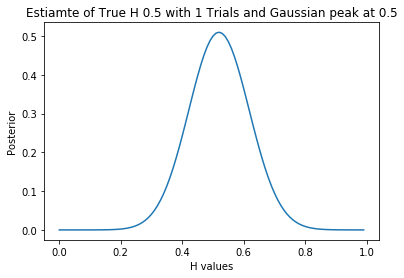

In [24]:
vsHG(.5,1,Hs,1,.5,.1)

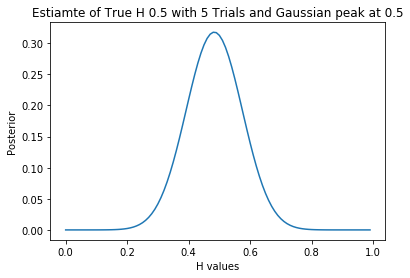

In [25]:
vsHG(.5,5,Hs,1,.5,.1)

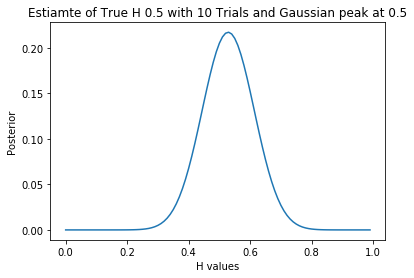

In [26]:
vsHG(.5,10,Hs,1,.5,.1)

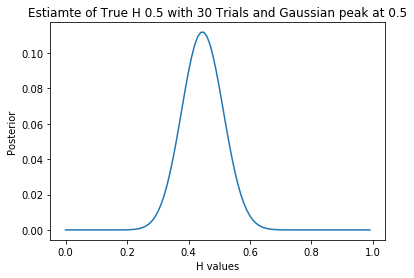

In [27]:
vsHG(.5,30,Hs,1,.5,.1)

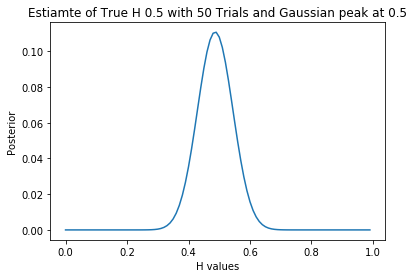

In [28]:
vsHG(.5,50,Hs,1,.5,.1)

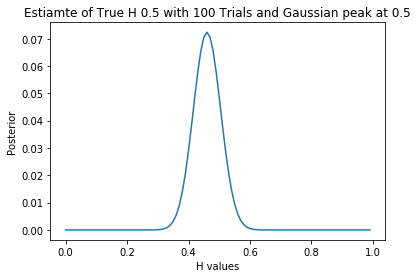

In [29]:
vsHG(.5,100,Hs,1,.5,.1)

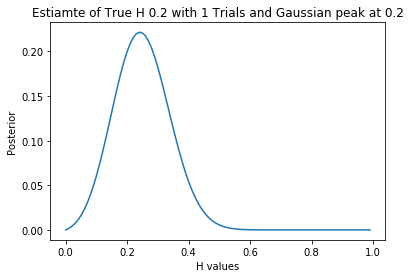

In [30]:
vsHG(.2,1,Hs,1,.2,.1)

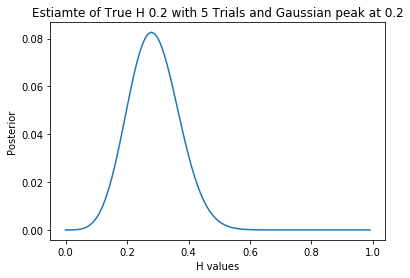

In [31]:
vsHG(.2,5,Hs,1,.2,.1)

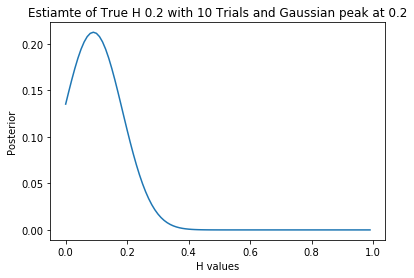

In [32]:
vsHG(.2,10,Hs,1,.2,.1)

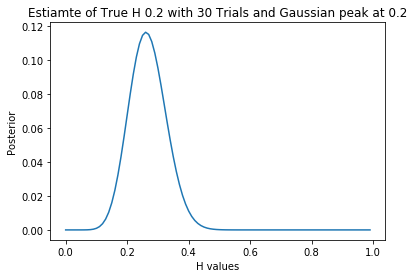

In [33]:
vsHG(.2,30,Hs,1,.2,.1)

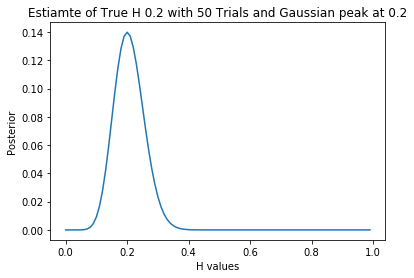

In [34]:
vsHG(.2,50,Hs,1,.2,.1)

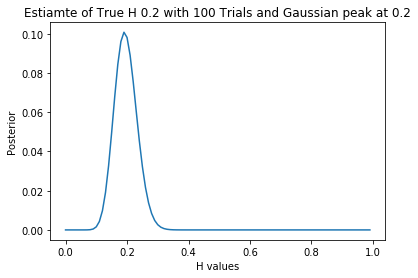

In [35]:
vsHG(.2,100,Hs,1,.2,.1)

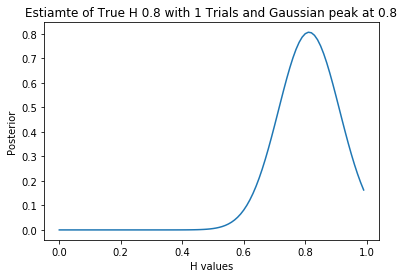

In [36]:
vsHG(.8,1,Hs,1,.8,.1)

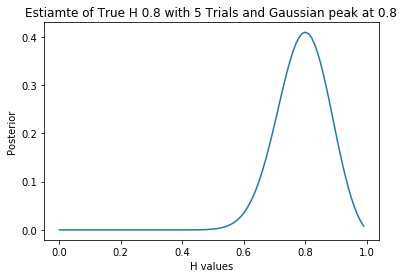

In [37]:
vsHG(.8,5,Hs,1,.8,.1)

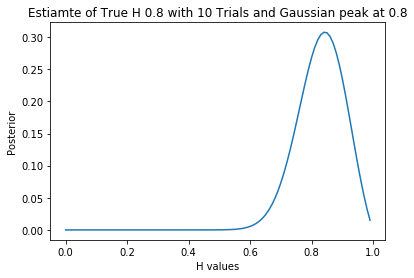

In [38]:
vsHG(.8,10,Hs,1,.8,.1)

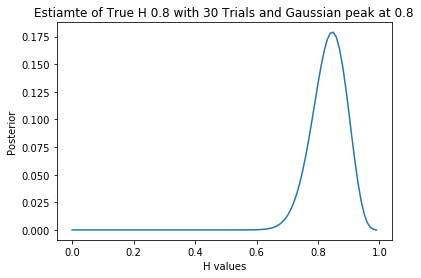

In [39]:
vsHG(.8,30,Hs,1,.8,.1)

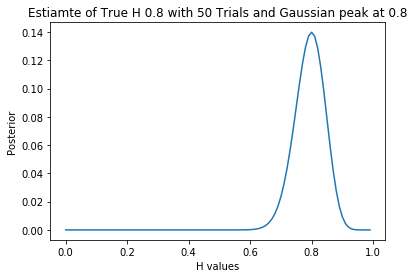

In [40]:
vsHG(.8,50,Hs,1,.8,.1)

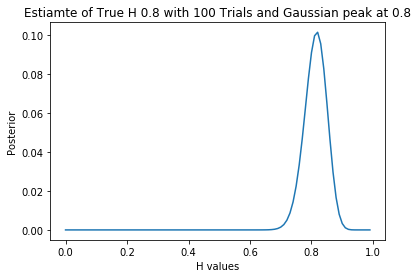

In [41]:
vsHG(.8,100,Hs,1,.8,.1)

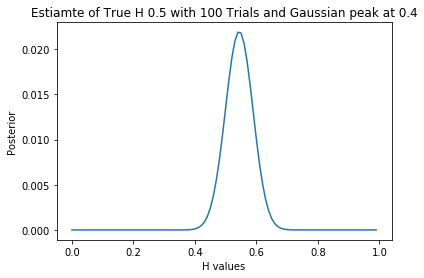

In [42]:
vsHG(.5,100,Hs,1,.4,.1)

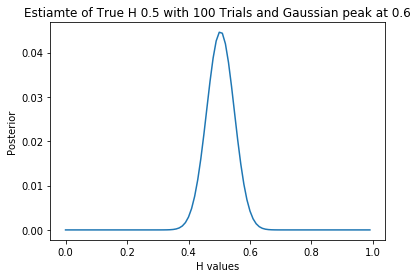

In [43]:
vsHG(.5,100,Hs,1,.6,.1)

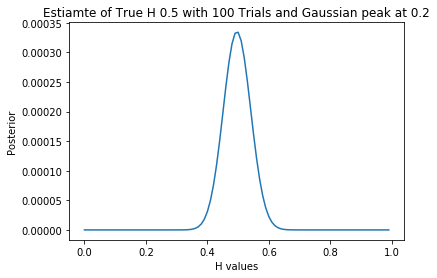

In [44]:
vsHG(.5,100,Hs,1,.2,.1)

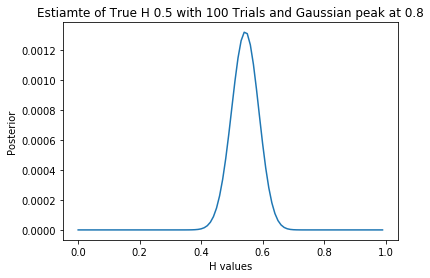

In [45]:
vsHG(.5,100,Hs,1,.8,.1)

**Part II**


We see from figure 2.7 that in order to be recoded a flash must occur at an angle between $\pm\frac{\pi}{2}$ and that $\beta\tan{\theta_k=x_k}$

Therefore $prob(x_k|\alpha,\beta,I)=\frac{\beta}{\pi[\beta^2 + (x_k-\alpha)^2]}$

Bayes' theorem:
$$prob(\alpha|\{x_k\},\beta,I) \propto prob(\{x_k\}|\alpha,\beta,I)*prob(\alpha|\beta,I)$$

Assume a uniform prior such that $prob(\alpha|\beta,I)=A$ when $|\alpha|$ is less than the limit of the coastline

$$prob(\{x_k\}|\alpha,\beta,I)=\prod_{k=1}^{N}prob(x_k|\alpha,\beta,I)$$

$$L=\log_e[prob(\{x_k\}|\alpha,\beta,I)]=Constant+N\log_e(\beta)-\prod_{k=1}^{N}\log_e[\beta^2 + (x_k-\alpha)^2]$$

In order to find $\alpha$ we must maximize $L$.

Lets assume that the true values for $\alpha$ and $\beta$ both equal 1km. Now we must make a modle lighthouse to generate our dataset.  

In [46]:
def lighthouse(a,b,N): 
    angl=np.random.uniform(-np.pi/2,np.pi/2,N)
    xk = b*np.tan(angl)+a
    return xk
lh=lighthouse(1,1,100)
print((lh))

[-1.36145253e+01  1.66381684e+00  1.71874394e+00  5.85896205e-01
  3.37943515e+00  2.27104668e+00  4.38600964e+00  3.75780857e+00
  9.81010343e-01  6.73159868e-01  1.55832749e+00 -6.62367952e-01
 -4.51133572e-01  7.66355724e-01 -1.40508487e-01 -5.95849237e+00
 -3.52970786e+01  4.37856729e+00  2.24768768e-01  4.76712749e+00
 -1.79209826e+00 -2.03836371e+00  1.34794378e+00  1.41846018e+00
  9.96742196e-01 -3.04024435e+00  6.59532171e-01  9.24226471e-01
 -1.60548373e+00  2.06281874e+00 -3.45125169e+00  4.14226446e+00
 -3.91382178e-02  6.01506995e-01  2.80352575e-01 -2.63702449e+00
 -3.19420911e+00  5.26870031e-01  1.83749813e+00  9.37228839e-01
 -2.20890552e+00  1.59311628e+00  1.30061874e+00  1.66092419e+00
  9.42321687e+01  9.89851637e+00 -2.69534632e+00  3.72167722e-01
  6.99009240e-01  1.37897961e+00  4.73100916e-01  1.30193570e+00
  1.81318896e+00 -1.67823780e+01  1.17780550e+00  1.64075670e+00
  1.51365641e+00  7.31799593e-01  1.83939843e+00 -2.36389207e+00
  8.72026966e-01  1.14213

In [47]:
lh[:5]

array([-13.61452526,   1.66381684,   1.71874394,   0.58589621,
         3.37943515])

In [48]:
def L1(l,b,alist,N):
    ls=[]
    lN=l[:N]
    for a0 in alist:
        lg=np.log(b**2+(lN-a0)**2)
        sm=N*np.log(b)-np.sum(lg)
        ls=np.append(ls,sm)
    return(ls)

In [49]:
def Lplota(b,N):
    a = np.arange(-10,10,.001)
    L=L1(lh,b,a,N)
    plt.xlabel(r'$\alpha$ values in Km')
    plt.ylabel(r'$log_e$ of Posterior')
    plt.title('Estiamte of True '+r'$\alpha$ 1 Km with known $\beta$ of 1 Km and '+str(N)+' Trials')
    plt.plot(a,L)

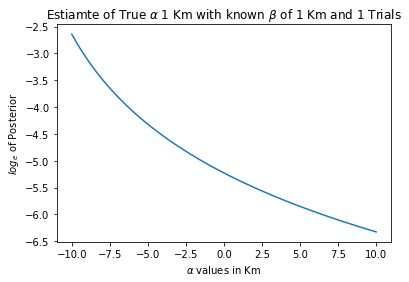

In [50]:
Lplota(1,1)

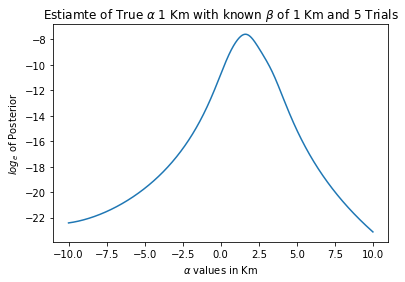

In [51]:
Lplota(1,5)

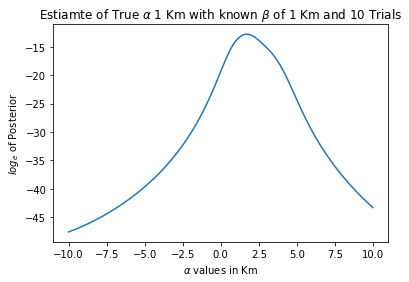

In [52]:
Lplota(1,10)

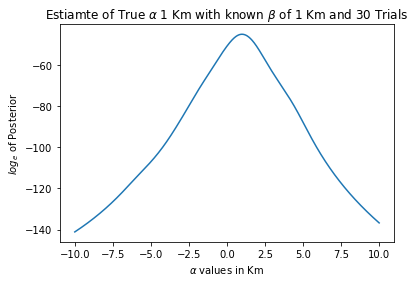

In [53]:
Lplota(1,30)

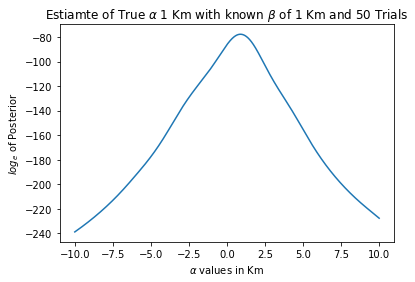

In [54]:
Lplota(1,50)

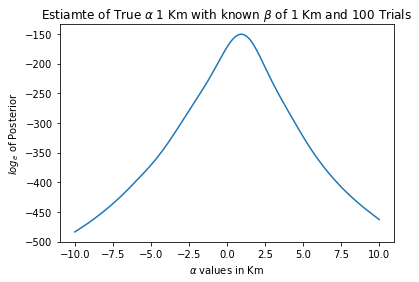

In [55]:
Lplota(1,100)

In [56]:
a = np.arange(-10,10,.001)
L100 = L1(lh,1,a,100)
apos = np.argmax(L100)
aest = a[apos]
print(aest)
np.mean(lh)

0.9389999999939374


-0.8254202971575367

For N = 100, this method produces an estimate that $\alpha =$ 0.834999999993995 for an percentage error of 16.5%. By simply taking the mean of $\{x_k\}$ we get an estimate that $\alpha =$ -0.16830777888200685 for a percentage error of 117%. The mean is not a good estimate because it  weights each flash equally and doesn't take the geometry of the problem into account. 

Now lets assume both $\alpha$ and $\beta$ are unknown

In [57]:
def L2(l,blist,alist,N):
    lN2=l[:N]
    ls2 = np.zeros((alist.size,blist.size))
    for j,b0 in enumerate(blist):
        for i,a0 in enumerate(alist):
            l2=N*np.log(b0)-np.sum(np.log(b0**2+(lN2-a0)**2))
            ls2[i,j] = l2
    return(ls2)

In [58]:
a = np.arange(-10,10,.005)
b = np.arange(.2,10,.005)
Ls = L2(lh,b,a,100)
bmesh,amesh = np.meshgrid(b,a)

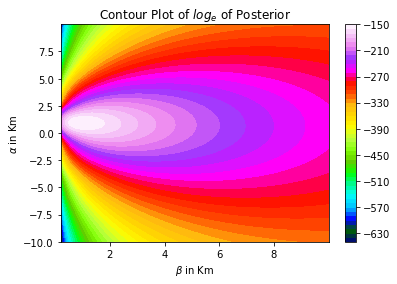

In [59]:
rb=plt.get_cmap('gist_ncar')
cp=plt.contourf(bmesh,amesh,Ls,50,cmap=rb)
plt.colorbar(cp)
plt.title(r'Contour Plot of $log_e$ of Posterior')
plt.xlabel(r'$\beta$ in Km')
plt.ylabel(r'$\alpha$ in Km')
plt.show()

This method identifies a small region in the $\alpha-\beta$ plane that includes the true position $\alpha=\beta=1Km$